In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

In [2]:
df = pd.read_csv("electricity_bill_dataset.csv")   

In [3]:
print(df.head())


   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB
None


In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
X = df.drop("MonthlyHours", axis=1)   

In [20]:
y = df["MonthlyHours"]

In [21]:
df.isnull().sum()

Fan                                                                           0
Refrigerator                                                                  0
AirConditioner                                                                0
Television                                                                    0
Monitor                                                                       0
MotorPump                                                                     0
Month                                                                         0
MonthlyHours                                                                  0
TariffRate                                                                    0
ElectricityBill                                                               0
City_Chennai                                                                  0
City_Dahej                                                                    0
City_Faridabad                          

In [22]:
numeric_df = df.select_dtypes(include=['number'])

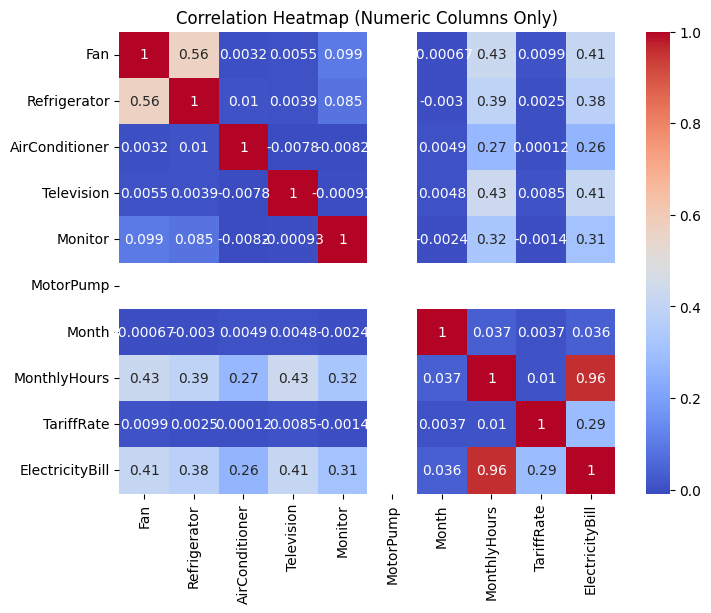

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

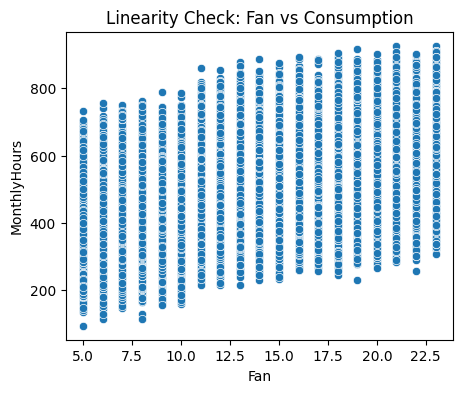

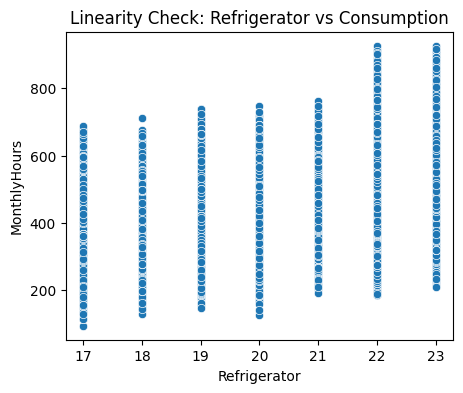

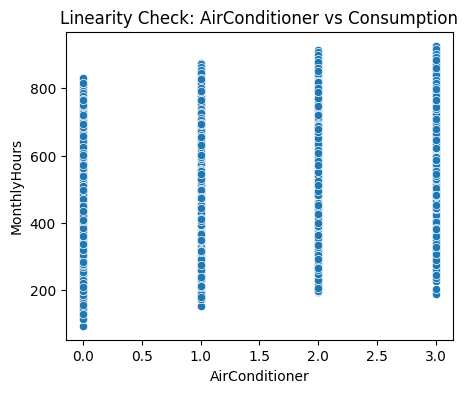

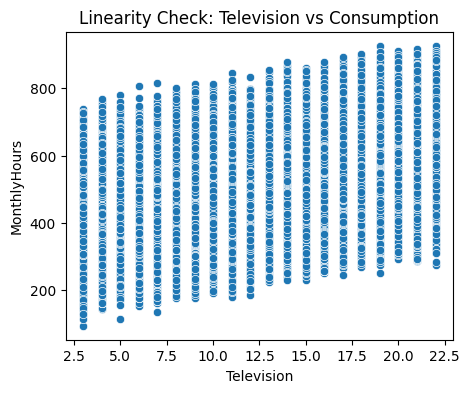

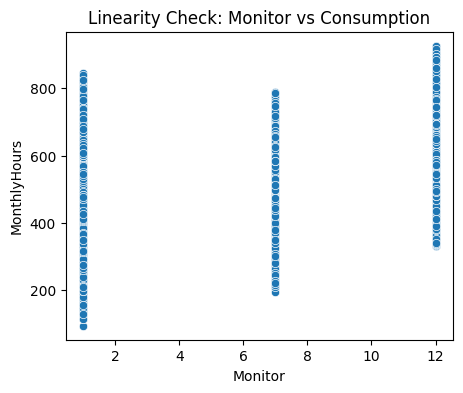

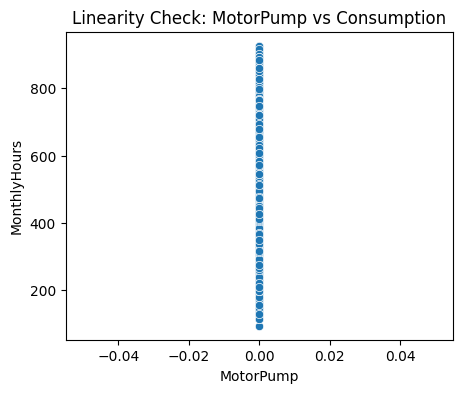

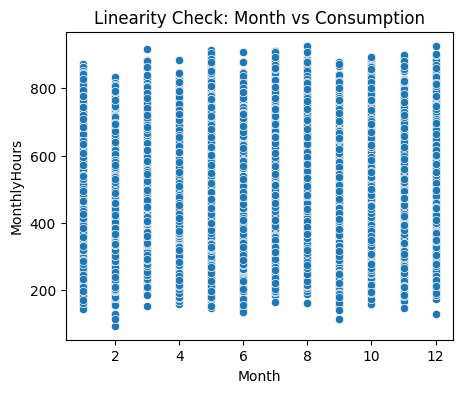

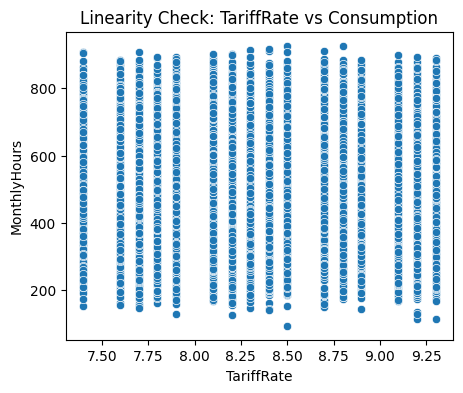

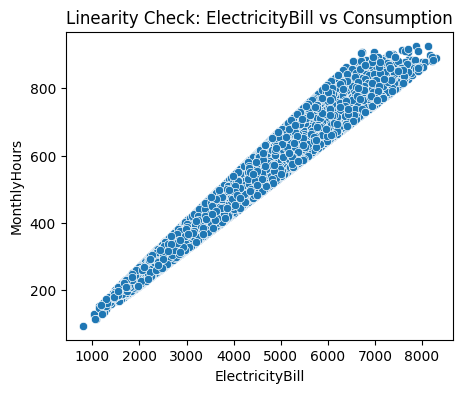

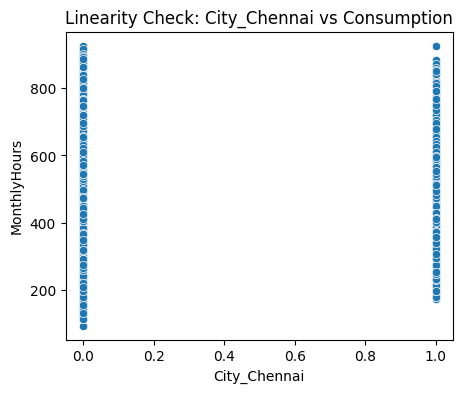

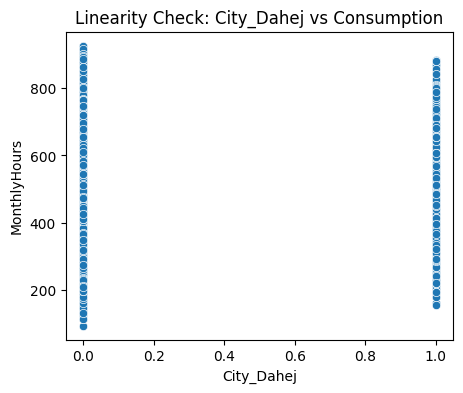

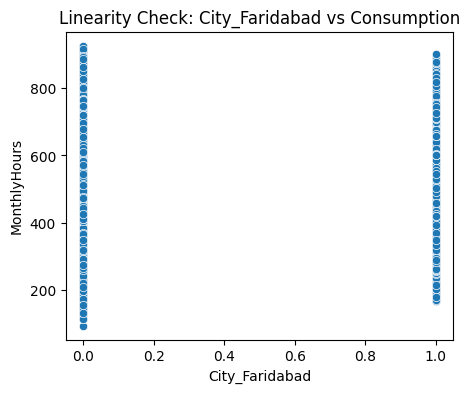

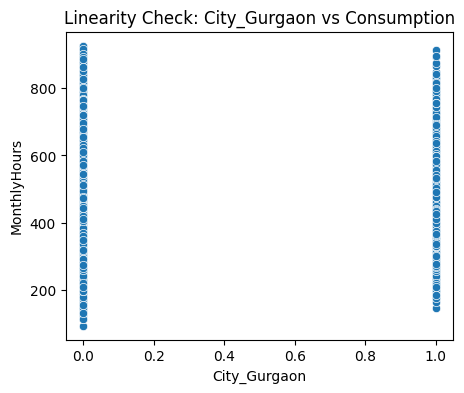

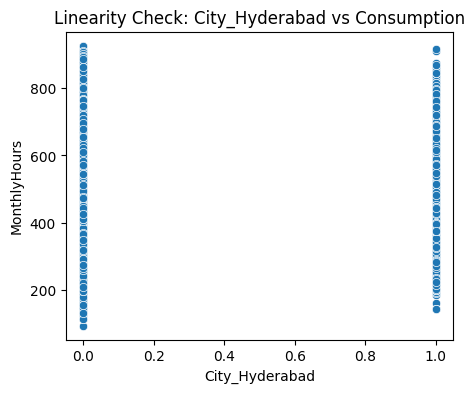

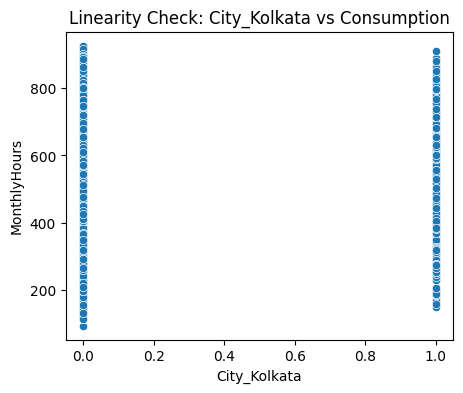

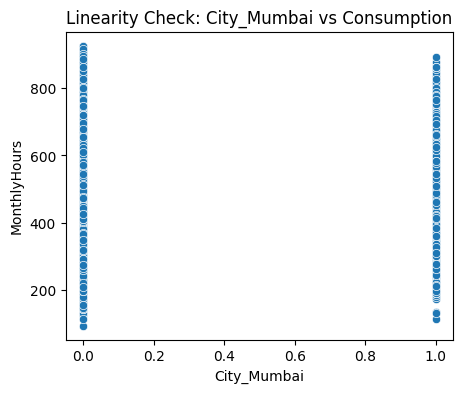

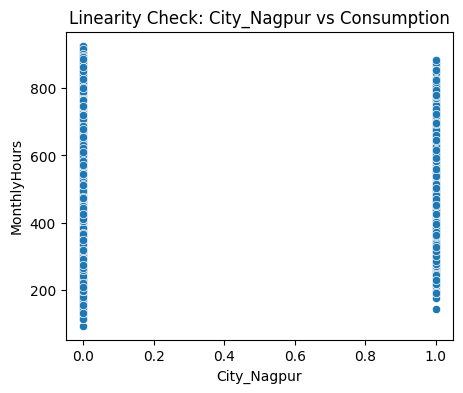

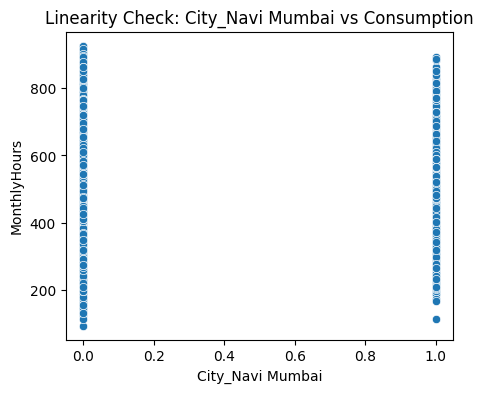

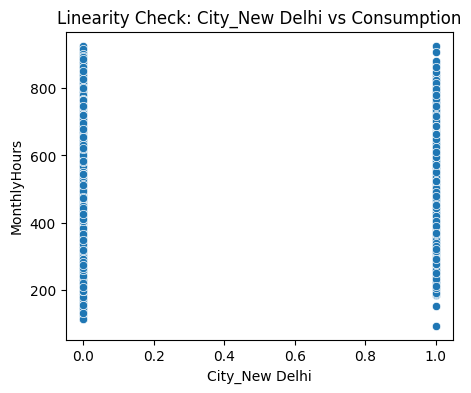

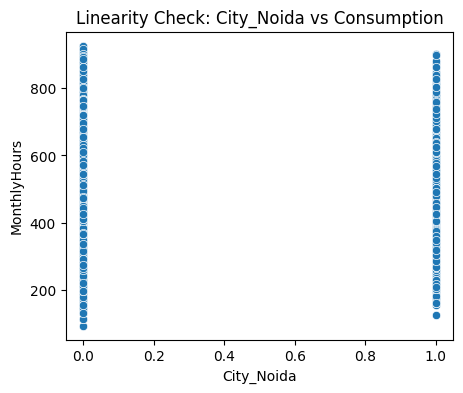

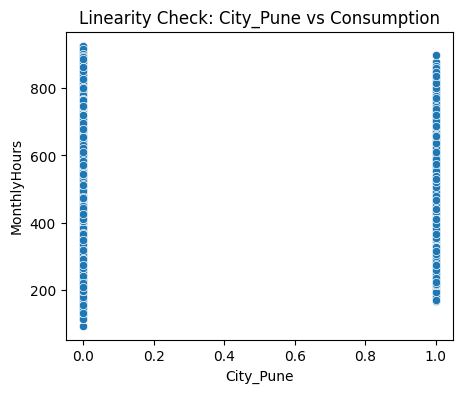

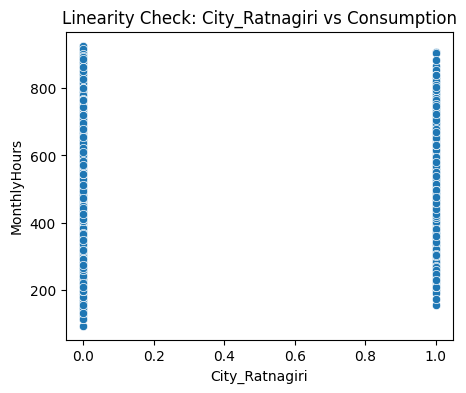

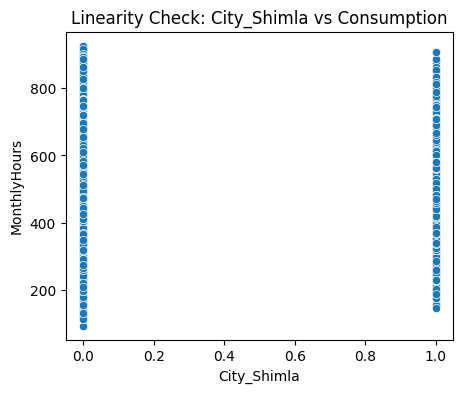

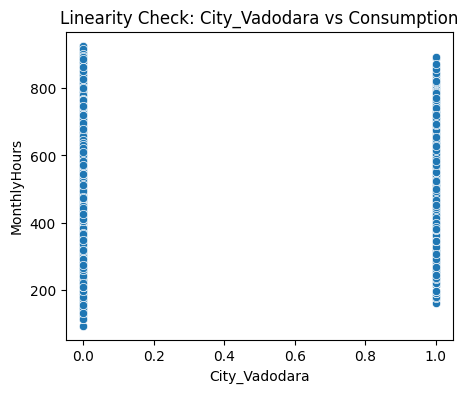

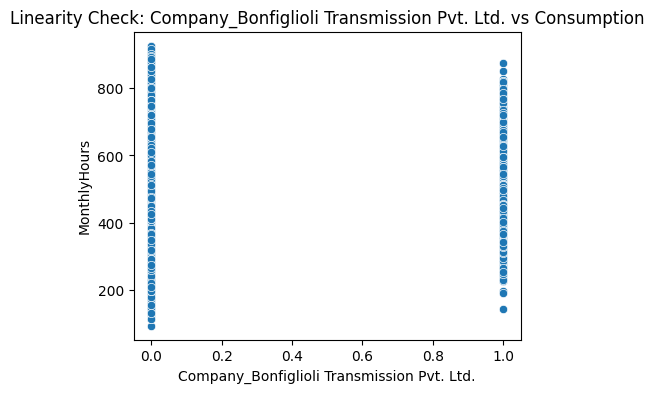

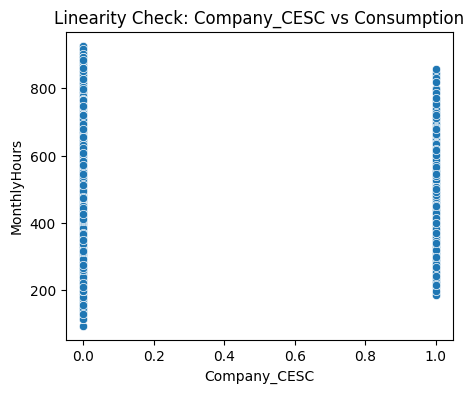

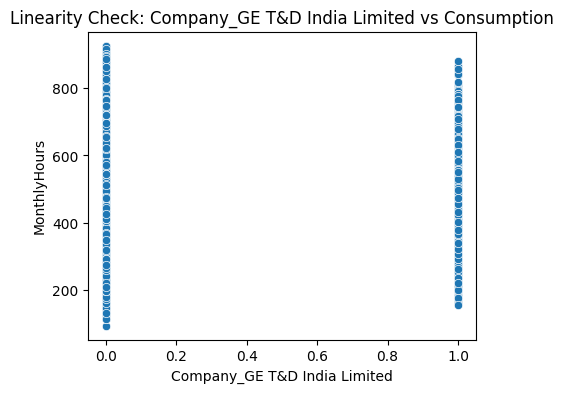

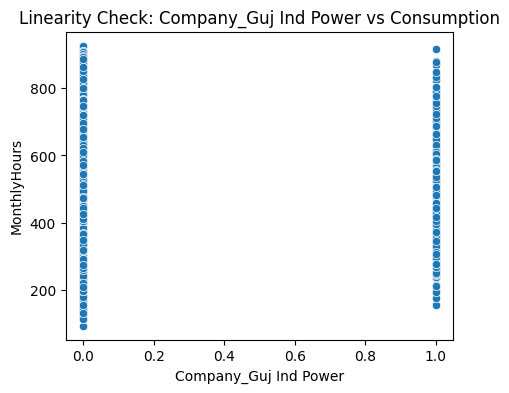

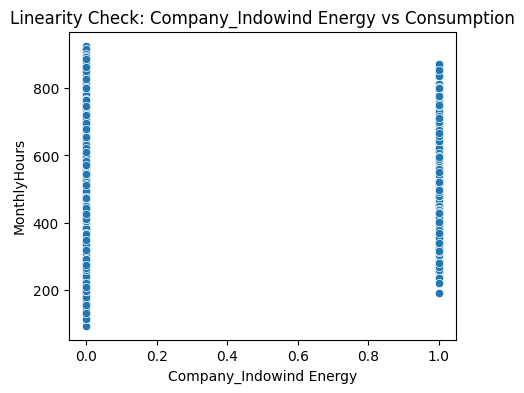

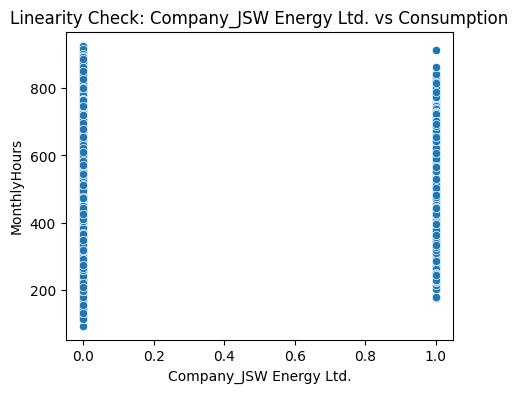

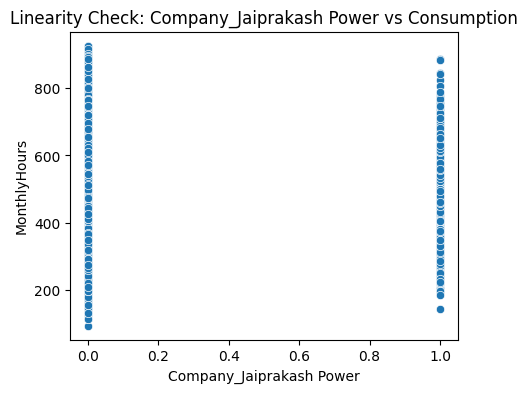

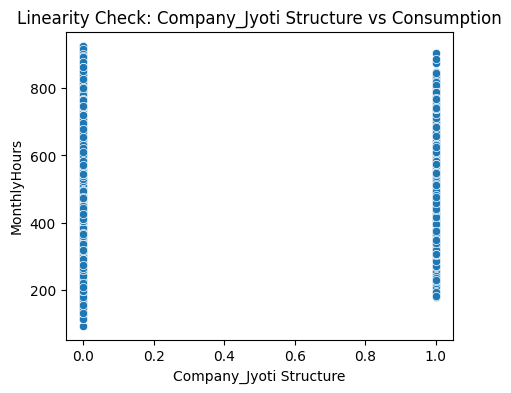

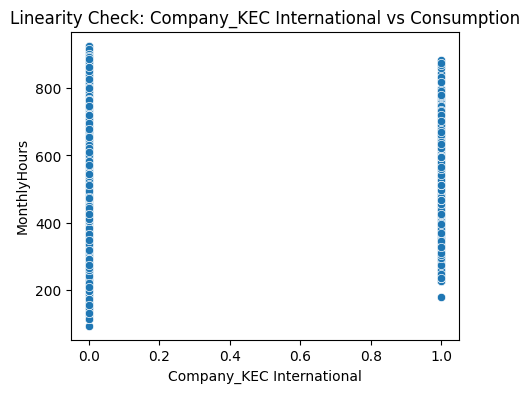

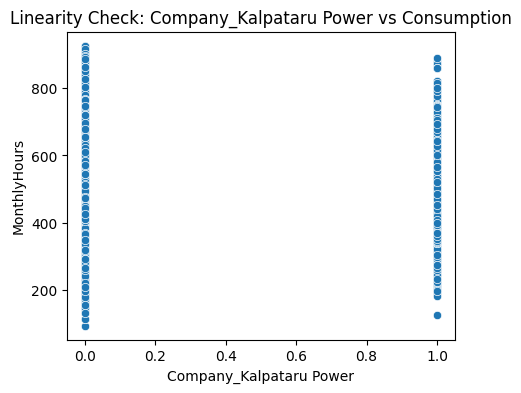

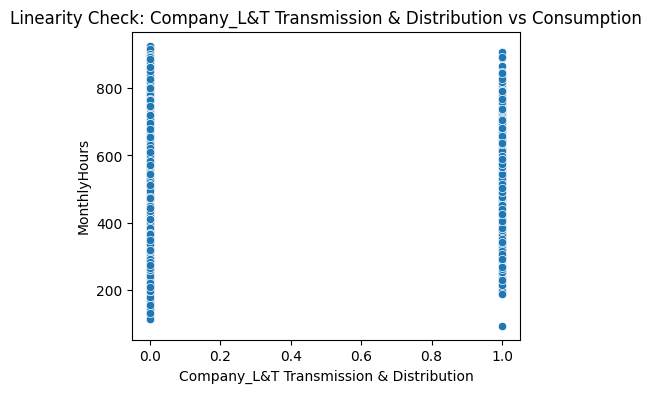

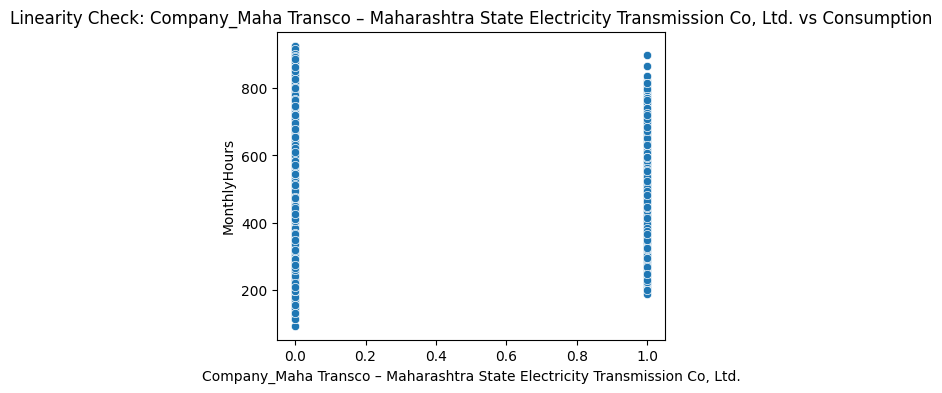

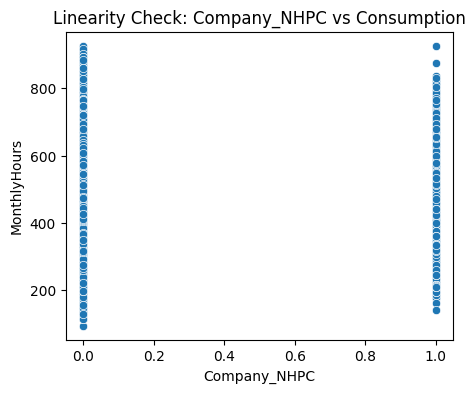

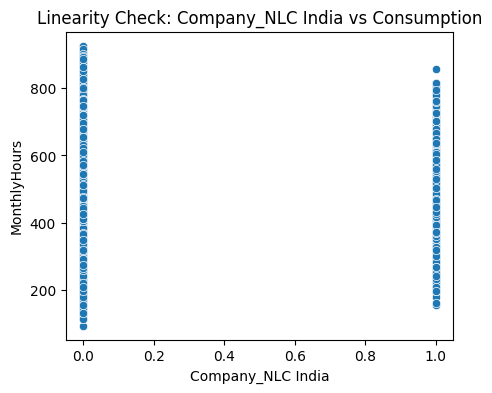

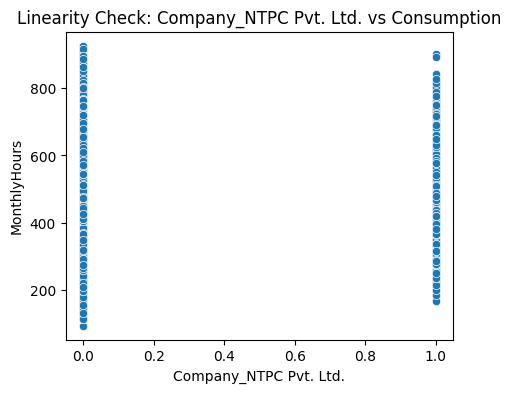

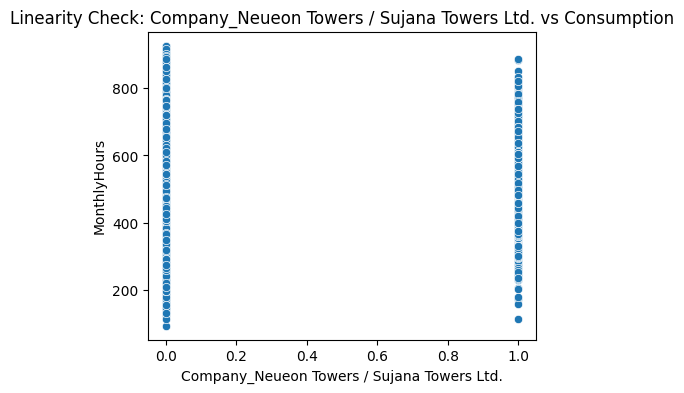

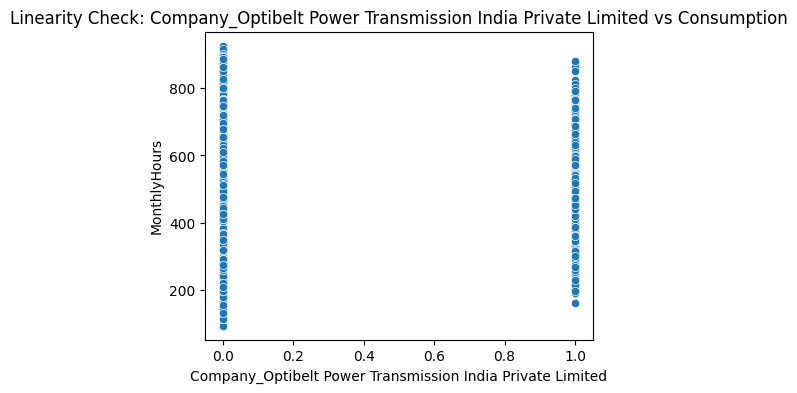

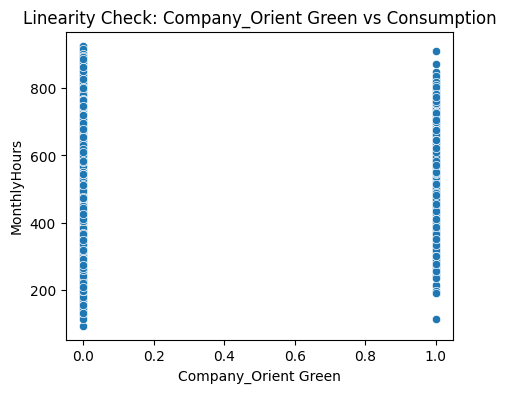

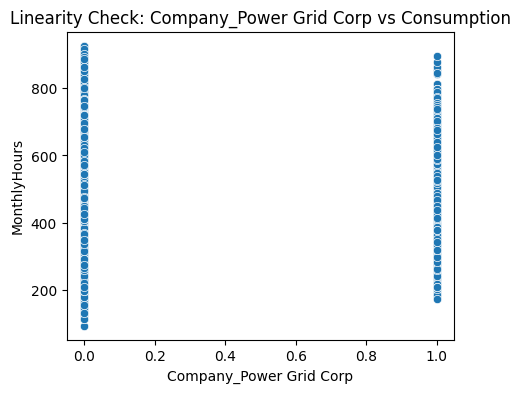

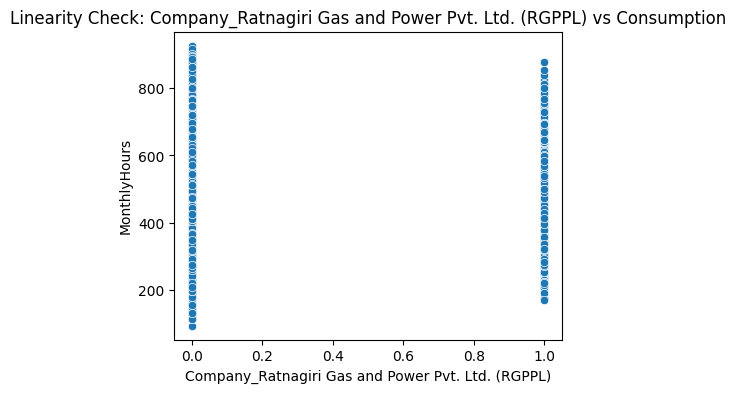

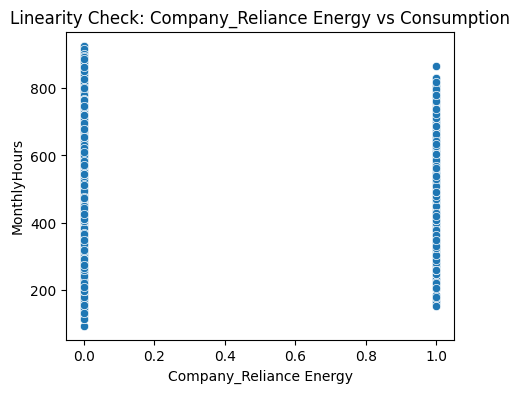

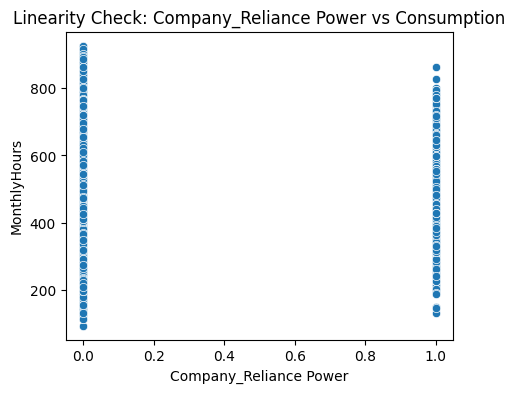

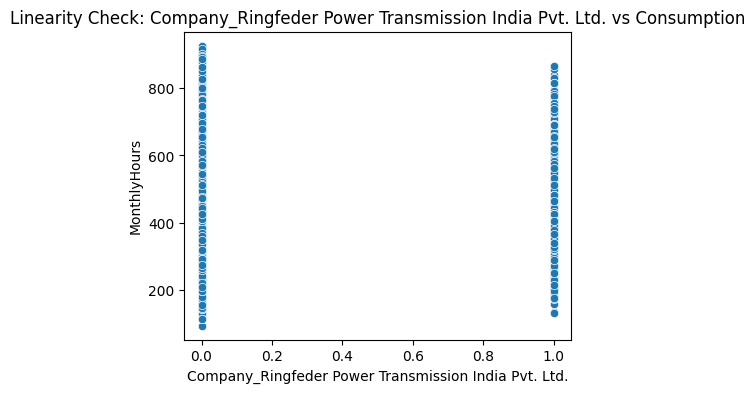

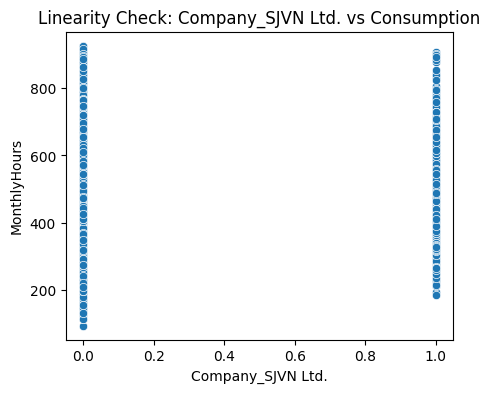

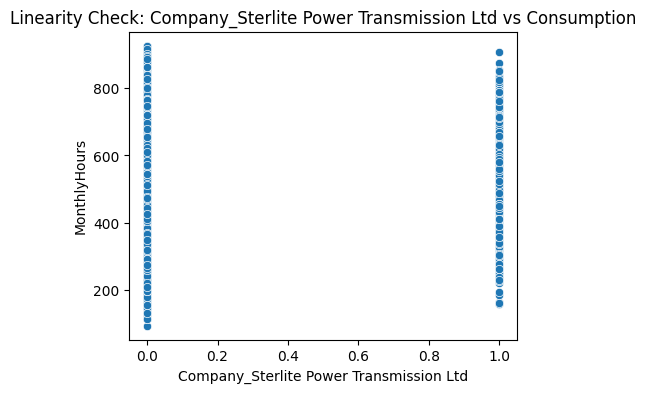

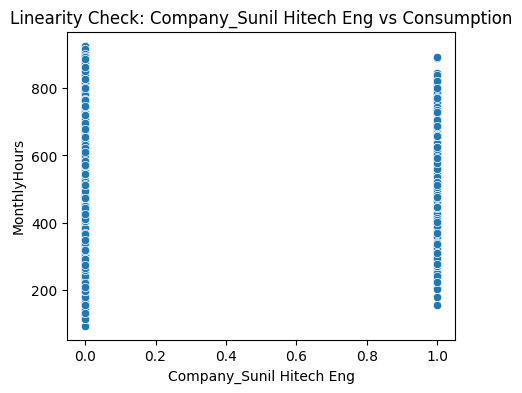

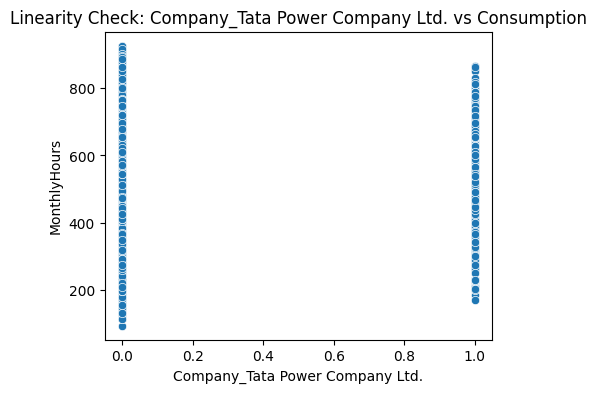

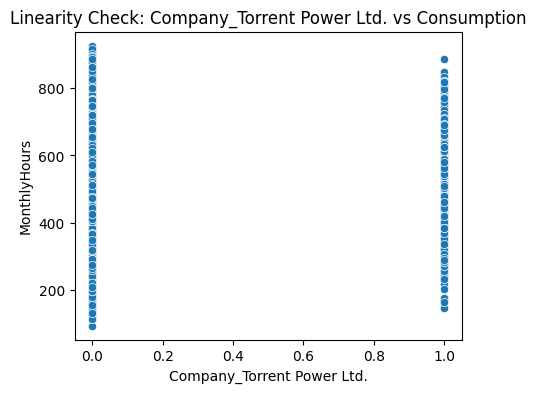

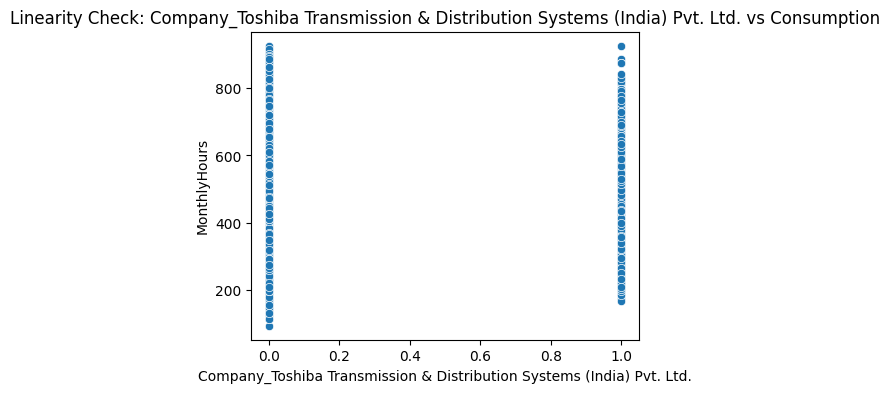

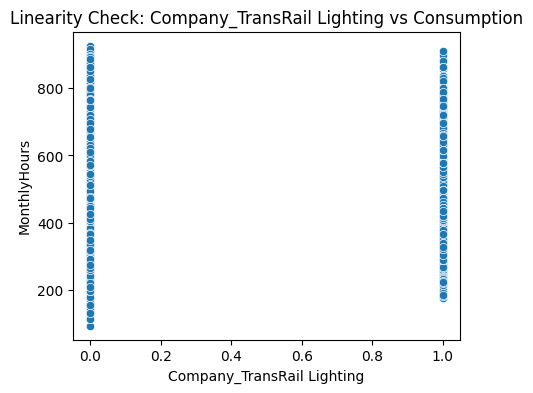

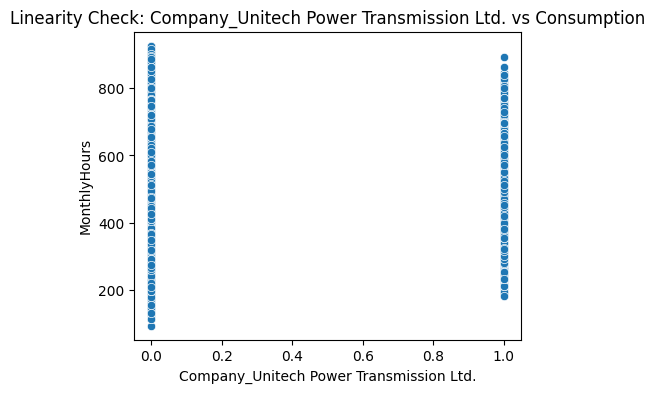

In [24]:
for col in X.columns:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=y)
    plt.title(f"Linearity Check: {col} vs Consumption")
    plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

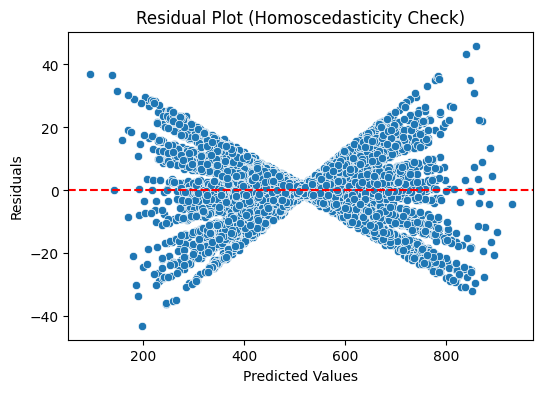

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot (Homoscedasticity Check)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

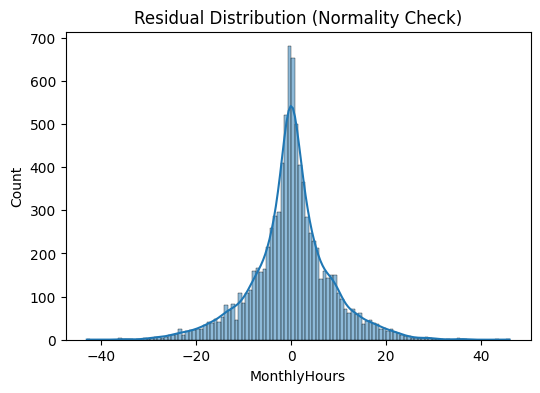

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Normality Check)")
plt.show()

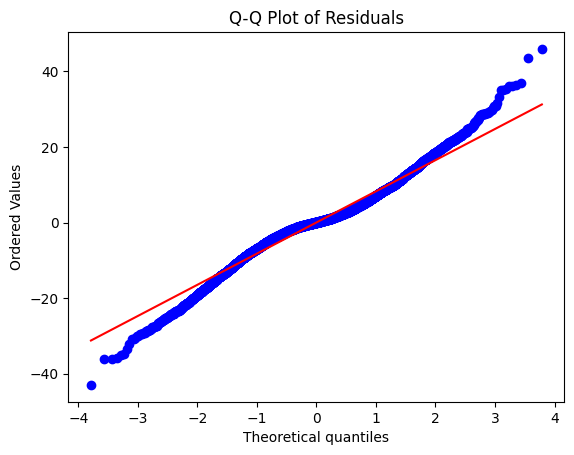

In [29]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

-----Assumption Consideration

Linear Regression is based on several key assumptions:

Linearity – Each independent variable should have a linear relationship with the target variable.

Independence of Errors – Residuals should not be correlated with one another.

Homoscedasticity – The variance of residuals should remain constant across all predicted values.

Normality of Residuals – The residuals should approximately follow a normal distribution.

No Perfect Multicollinearity – Independent variables should not be highly correlated with each other.

In the context of this dataset containing the number of residents, average household income, and the age of the house as features, these assumptions are reasonable. Electricity consumption typically shows predictable patterns based on household size, income level, and house characteristics, which suggests a potential linear relationship.

-----Decision Making

Based on the structure of the dataset and the results of the diagnostic analysis, Linear Regression appears to be a suitable modelling approach. The features are numerical, the target variable is continuous, and the relationships involved are likely to be linear or close to linear.

-----Justification
If Linear Regression is Appropriate

Linear Regression is appropriate for this dataset for the following reasons:

Linearity
Scatter plots of each feature against electricity consumption generally show a directional trend, indicating linear relationships.

Independence
Each observation represents a different household; therefore, residuals are expected to be independent.

Homoscedasticity
The residual-versus-predicted plot does not show increasing or decreasing spread. Variance appears to be reasonably constant.

Normality of Residuals
The residual distribution and Q–Q plot indicate that the residuals follow an approximately normal pattern.

No Perfect Multicollinearity
Variance Inflation Factor (VIF) values for the predictors remain below the commonly used threshold of 10, indicating that multicollinearity is not a problem.

Thus, the assumptions for linear regression are sufficiently satisfied for this dataset.

-----If Linear Regression Is Not Appropriate (Use this version if needed)

Linear Regression would not be recommended if the dataset violates one or more major assumptions, such as:

Non-linear relationships between features and the target variable

Heteroscedasticity in the residuals

Residuals that deviate strongly from a normal distribution

Very high multicollinearity (VIF values above 10)

In such situations, alternative models like polynomial regression or tree-based methods may provide better performance.